# Importing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta

%matplotlib inline
warnings.filterwarnings("ignore") # tired of warnings :)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

1. importing dataframe#1 ORDERS

In [ ]:
url = 'https://raw.githubusercontent.com/ryandipp/sql-project-aparilo-ecomms/main/data/apo_ecom_orders.csv'
orders = pd.read_csv(url, sep=';')
orders.head(3)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,2,1,Shipped,F,2022-09-23 16:02:00,NaN,2022-09-25 23:03:00,NaN,1
1,14,9,Shipped,F,2022-01-13 00:42:00,NaN,2022-01-15 09:26:00,NaN,1
2,23,14,Shipped,F,2022-07-06 16:45:00,NaN,2022-07-09 10:32:00,NaN,3


2. importing dataframe#2 ORDER ITEMS


In [ ]:
url = 'https://raw.githubusercontent.com/ryandipp/sql-project-aparilo-ecomms/main/data/apo_ecom_orderitems.csv'
oitems = pd.read_csv(url, sep=';')
oitems.head(3)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,134723,92627,73944,13606,363175,Shipped,2020-09-16 15:54:03,2020-09-15 14:00:00,NaN,NaN,2.50
1,92042,63301,50599,13606,248352,Complete,2023-01-16 10:52:40,2023-01-16 21:29:00,2023-01-21 10:49:00,NaN,2.50
2,75253,51752,41347,28951,202948,Shipped,2023-03-08 14:19:30,2023-03-06 19:05:00,NaN,NaN,3.00


3. importing dataframe#3 PRODUCTS


In [ ]:
url = 'https://raw.githubusercontent.com/ryandipp/sql-project-aparilo-ecomms/main/data/apo_ecom_products.csv'
products = pd.read_csv(url, sep = ';') 
products.head(3)

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,27569,92.65,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.41,Men,B23C5765E165D83AA924FA8F13C05F25,1.00
1,27445,24.72,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.99,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1.00
2,27457,15.90,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.60,Men,8F831227B0EB6C6D09A0555531365933,1.00


4. importing dataframe#4 USERS

In [ ]:
url = 'https://raw.githubusercontent.com/ryandipp/sql-project-aparilo-ecomms/main/data/apo_ecom_users.csv'
users = pd.read_csv(url, sep = ';')
users.head(3)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,14362,Mary,Harper,maryharper@gmail.com,59,F,Mie,3993 Rodriguez Squares,513-0836,Suzuka City,Japan,34.85,136.51,Search,2019-11-19 15:56:00
1,73189,Christopher,Richardson,christopherrichardson@gmail.com,24,M,Mie,40390 Andrea Plaza Suite 795,513-0836,Suzuka City,Japan,34.85,136.51,Email,2021-12-21 06:43:00
2,327,Courtney,Smith,courtneysmith@gmail.com,45,F,Acre,218 Jeanette Fields,69917-400,Rio Branco,Brasil,-9.95,-67.84,Search,2020-10-16 18:18:00


# Data Cleaning: fixing: data type, null, duplicates

copy all original DF (data frame)

In [ ]:
t_orders = orders.copy()
t_oitems = oitems.copy()
t_products = products.copy()
t_users = users.copy()
#copying done

DF orders treatment

In [ ]:
t_orders['created_at'] = pd.to_datetime(t_orders['created_at'], format = '%Y-%m-%d %H:%M:%S')
t_orders['returned_at'] = pd.to_datetime(t_orders['returned_at'], format = '%Y-%m-%d %H:%M:%S')
t_orders['shipped_at'] = pd.to_datetime(t_orders['shipped_at'], format = '%Y-%m-%d %H:%M:%S')
t_orders['delivered_at'] = pd.to_datetime(t_orders['delivered_at'], format = '%Y-%m-%d %H:%M:%S')

DF orderitems (oi) treatment

In [ ]:
t_oitems['created_at'] = pd.to_datetime(t_oitems['created_at'], format = '%Y-%m-%d %H:%M:%S')
t_oitems['returned_at'] = pd.to_datetime(t_oitems['returned_at'], format = '%Y-%m-%d %H:%M:%S')
t_oitems['shipped_at'] = pd.to_datetime(t_oitems['shipped_at'], format = '%Y-%m-%d %H:%M:%S')
t_oitems['delivered_at'] = pd.to_datetime(t_oitems['delivered_at'], format = '%Y-%m-%d %H:%M:%S')

DF users treatment

In [ ]:
t_users.info()
#found nulls in 'city' DS (dataseries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99037 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [ ]:
t_users = t_users.rename(columns={'created_at':'acc_made'}) 

converting account 'created_at' to date only

In [ ]:
t_users['acc_made'] = pd.to_datetime(t_users['acc_made'], format= '%Y-%m-%d %H:%M:%S').dt.date

In [ ]:
t_users['acc_made'] = pd.to_datetime(t_users['acc_made'], format= '%Y-%m-%d')

In [ ]:
t_users.dropna(subset= ['city'], inplace = True)

DF products treatment

In [ ]:
t_products.info()
#findings: products without SKU, department, distributor info (<1% of all data)
#          name & brand DS nulls -> can be manipulated by filling each other

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29074 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29095 non-null  object 
 7   sku                     29095 non-null  object 
 8   distribution_center_id  29095 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.0+ MB


In [ ]:
t_products.dropna(subset = ['department','sku','distribution_center_id'], inplace= True)

filling name & brand DS with eachother

In [ ]:
t_products['brand'].fillna(t_products['name'].str.split().str[:3].str.join(' '), inplace= True)

In [ ]:
t_products['name'].fillna(t_products['brand'], inplace= True)

we will fix all datatype of DS columns later

saving cleaned up & formatted DFs


In [ ]:
d_orders = t_orders.copy()
d_oitems = t_oitems.copy()
d_users = t_users.copy()
d_products = t_products.copy()

##Checking all DF contents

In [ ]:
def check_values(df):
  for c in df.columns:
    unique_qty = df[c].value_counts()
    print(f'Column: {c}')
    print(unique_qty, '\n')

In [ ]:
check_values(d_users) #fill function argument with all DF

#there's typo in country subset, 'Espana' which same as existant 'Spain'. we will replace it.

Column: id
14362    1
36812    1
75431    1
72719    1
62299    1
        ..
28533    1
23345    1
19013    1
11662    1
70300    1
Name: id, Length: 99037, dtype: int64 

Column: first_name
Michael        2230
James          1534
David          1528
Jennifer       1453
Christopher    1387
               ... 
Neil              6
Darin             6
Kellie            6
Gene              6
Perry             5
Name: first_name, Length: 690, dtype: int64 

Column: last_name
Smith       2171
Johnson     1711
Williams    1407
Brown       1250
Jones       1211
            ... 
Finley        22
Arroyo        22
Ewing         21
Kaiser        21
Davies        18
Name: last_name, Length: 1000, dtype: int64 

Column: email
michaelsmith@gmail.com      52
davidsmith@gmail.com        49
johnsmith@gmail.com         38
jamessmith@gmail.com        34
michaelbrown@gmail.com      34
                            ..
bobbyrobinson@gmail.com      1
cherylhunter@gmail.com       1
dianarowe@gmail.com          1

In [ ]:
d_users['country']=d_users['country'].replace({'España':'Spain'})

# Merging DFs

orders + orderitems DF

In [ ]:
d_orderitem = pd.merge(d_oitems, d_orders, on = 'order_id', how = 'left' )

Dropping irrelevant columns

In [ ]:
d_orderitem.drop(columns= ['user_id_y','status_y','created_at_y','returned_at_y','shipped_at_y','delivered_at_y','num_of_item','id'], axis = 1, inplace= True)

preparing products DF before merging

In [ ]:
clean_products = d_products.copy()

In [ ]:
clean_products.drop(columns= ['name','retail_price','sku'], axis= 1, inplace= True)

Merging d_orderitem + products

In [ ]:
d_op = pd.merge(d_orderitem, clean_products, left_on= 'product_id', right_on= 'id', how= 'left')

In [ ]:
d_op.drop(columns = 'id', axis=1, inplace= True)

In [ ]:
d_op.info()
# findings = there are orders for blank products (caused by cleanedup products)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181735 entries, 0 to 181734
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                181735 non-null  int64         
 1   user_id_x               181735 non-null  int64         
 2   product_id              181735 non-null  int64         
 3   inventory_item_id       181735 non-null  int64         
 4   status_x                181735 non-null  object        
 5   created_at_x            181735 non-null  datetime64[ns]
 6   shipped_at_x            118309 non-null  datetime64[ns]
 7   delivered_at_x          64047 non-null   datetime64[ns]
 8   returned_at_x           18335 non-null   datetime64[ns]
 9   sale_price              181735 non-null  float64       
 10  gender                  181735 non-null  object        
 11  cost                    181584 non-null  float64       
 12  category                181584

preparing users DF before merging

In [ ]:
clean_users = d_users.copy()

In [ ]:
clean_users.drop(columns=['first_name','last_name','email','gender','street_address','postal_code','latitude','longitude'],
                 axis=1, inplace=True)

Final merging

In [ ]:
df_a = pd.merge(d_op, clean_users, left_on= 'user_id_x', right_on='id', how= 'left')

In [ ]:
df_a.drop(columns=['inventory_item_id','id'],
                 axis=1, inplace=True)

In [ ]:
df_a['created_at_x']=pd.to_datetime(df_a['created_at_x'])
df_a['shipped_at_x']=pd.to_datetime(df_a['shipped_at_x'])
df_a['delivered_at_x']=pd.to_datetime(df_a['delivered_at_x'])
df_a['returned_at_x']=pd.to_datetime(df_a['returned_at_x'])
df_a['acc_made']=pd.to_datetime(df_a['acc_made'])

Dropping nulls from df_a DF (orders, orderitems, products, users)

In [ ]:
df_a.dropna(subset='age', inplace=True)

In [ ]:
df_a.dropna(subset='cost', inplace=True)

In [ ]:
df_a['distribution_center_id'] = df_a['distribution_center_id'].astype(int)
df_a['age'] = df_a['age'].astype(int) 

# Removing Outliers (for clustering)

In [ ]:
from scipy import stats

visualizing the outliers via Boxplot

<Axes: ylabel='Density'>

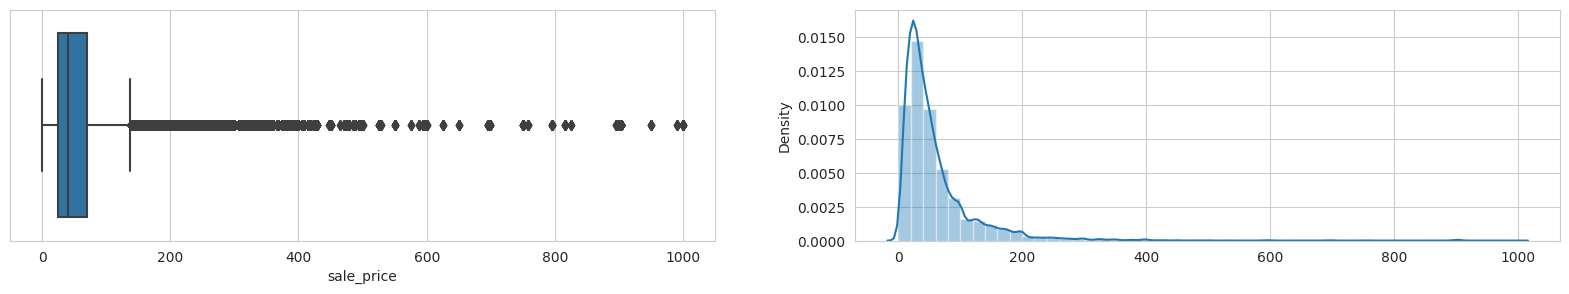

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,3))
sns.set_style('whitegrid')
sns.boxplot(x = dfa['sale_price'], ax = ax[0])
sns.distplot(x = dfa['sale_price'], kde = True, ax = ax[1])

Removing outliers via Z-score method

In [ ]:
z_s = stats.zscore(dfa['sale_price'])

In [ ]:
dfc=dfa[(z_s<3)]

<Axes: ylabel='Density'>

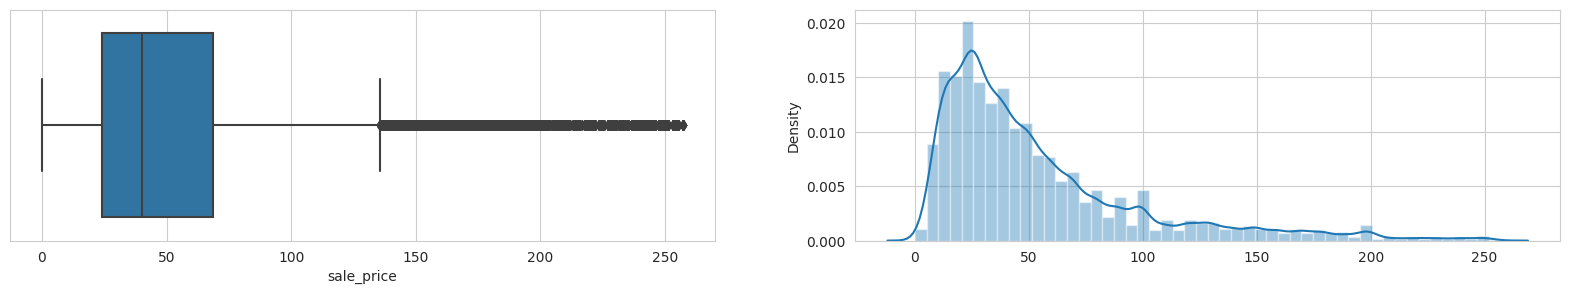

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,3))
sns.set_style('whitegrid')
sns.boxplot(x = dfc['sale_price'], ax = ax[0])
sns.distplot(x = dfc['sale_price'], kde = True, ax = ax[1])

save to CSV (optional)

In [ ]:
dfclean=dfclean.rename(columns = ({'user_id_x':'user_id',
                           'status_x':'status',
                           'created_at_x':'created',
                           'shipped_at_x':'shipped',
                           'delivered_at_x':'delivered',
                           'returned_at_x':'returned'}))

# EDA

Filtering confirmed bought order (status: processing, shipped, complete)

In [ ]:
df_buy = dfclean[~dfclean['status'].isin(['Cancelled','Returned'])]
df_buy.drop(columns='returned', axis = 1, inplace=True)

##EDA 1: 6 Months vs 6 Months Order Frequency & Average Order Value

filtering the timeline



In [ ]:
#Last 6 months from Q1 2023
last_vi = datetime(2023,5,1) - timedelta(days=180)

#last 12-6 months
before_last_vi = last_vi - timedelta(days = 180)

In [ ]:
buy_past6 = df_buy[df_buy['created'] >= last_vi]

In [ ]:
buy_past12_6 = df_buy[(df_buy['created'] >= before_last_vi) & (df_buy['created'] < last_vi)]

order frequency per user & order value | past 6 months vs 6 months before





In [ ]:
#order frequency PAST 6 MONTHS
jumlah_order = buy_past6['order_id'].count()
distinct_user = buy_past6['user_id'].nunique()
of = jumlah_order / distinct_user

#order_value in average
mean_order_value = buy_past6['sale_price'].mean()

In [ ]:
#order frequency PAST 12-6 MONTHS
jumlah_order2 = buy_past12_6['order_id'].count()
distinct_user2 = buy_past12_6['user_id'].nunique()
of2 = jumlah_order2/distinct_user2

#average order value
mean_order_value2 = buy_past12_6['sale_price'].mean()

compiling the data to DF

In [ ]:
retention6monthsvs6months = pd.DataFrame({'Timeline Group':['Past_6_months','Past_12_6_months'],
                                          'Order Freq':[of,of2],
                                          'Avr Order Value':[mean_order_value, mean_order_value2]})

In [ ]:
retention6monthsvs6months

,Timeline Group,Order Freq,Avr Order Value
0,Past_6_months,1.79,53.80
1,Past_12_6_months,1.60,54.09



EDA 1.a: important business metrics: order frequency, average order value, revenue. per year

In [ ]:
user_count = df_buy['user_id'].nunique()

buy_metrics = df_buy.groupby(df_buy['created'].dt.year).agg(
    order_freq = ('order_id', lambda x: x.count()/user_count),
    avg_order_value = ('sale_price','mean'),
    total_revenue = ('sale_price','sum')
).reset_index()
#ignore year 2023

In [ ]:
buy_metrics

,created,order_freq,avg_order_value,total_revenue
0,2019,0.06,53.22,205326.91
1,2020,0.20,53.96,689602.54
2,2021,0.41,53.61,1425340.78
3,2022,0.80,53.88,2809410.81
4,2023,0.57,53.91,2012025.05


##EDA 2: Revenue from each country

grouby & aggregate multiple columns and multiple condition:
Revenue/country year to year

In [ ]:
df_buy.groupby('country').agg(
    revenue2019= ('sale_price', lambda x: x[df_buy['created'].dt.year==2019].sum()),
    revenue2020= ('sale_price', lambda x: x[df_buy['created'].dt.year==2020].sum()),
    revenue2021= ('sale_price', lambda x: x[df_buy['created'].dt.year==2021].sum()),
    revenue2022= ('sale_price', lambda x: x[df_buy['created'].dt.year==2022].sum())
).sort_values('revenue2022', ascending=False).reset_index()


,country,revenue2019,revenue2020,revenue2021,revenue2022
0,China,70363.25,232737.46,487254.32,967150.71
1,United States,43625.42,160154.03,321728.38,631857.98
2,Brasil,29196.96,96887.29,196751.40,388466.62
3,South Korea,13686.18,41068.72,81679.74,148757.25
4,United Kingdom,9960.60,29688.82,64773.99,135385.89
5,France,11803.99,30223.67,64256.33,132641.26
6,Germany,7757.78,28918.72,61895.80,116301.95
7,Spain,7441.33,27734.04,55182.12,113225.55
8,Japan,4728.68,17198.83,40339.61,69031.68
9,Australia,3971.61,17023.20,29576.24,62650.64


EDA 2.a: 2022 monthly revenue trend

In [ ]:
monthly2022_rev=df_buy.groupby(df_buy['created'].dt.month).agg(
    revenue=('sale_price', lambda x: x[df_buy['created'].dt.year==2022].sum())
).rename_axis('month of 2022').reset_index()

monthly2022_rev

,month of 2022,revenue
0,1,168212.72
1,2,160355.61
2,3,187487.39
3,4,198928.12
4,5,200946.40
5,6,228410.42
6,7,230426.96
7,8,248569.66
8,9,259450.74
9,10,291323.91


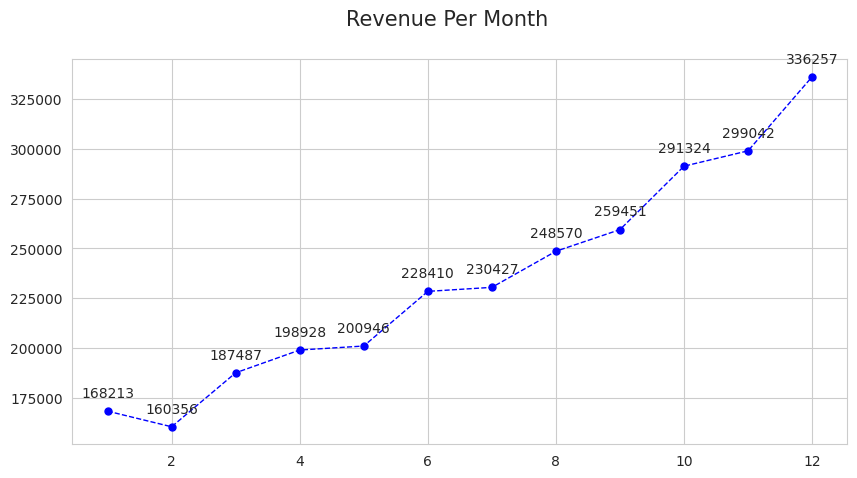

In [ ]:
fig = plt.figure(figsize = (10,5))
fig.suptitle('Revenue Per Month', fontsize = 15)

x = monthly2022_rev['month of 2022']
y = monthly2022_rev['revenue']
plt.plot(x, y, color='blue', marker='o', linestyle='dashed',
     linewidth=1, markersize=5)
for x,y in zip(x,y):
  label = '{:.0f}'.format(y)

  plt.annotate(label,
               (x,y),
               textcoords='offset points',
               xytext =(0,10),
               ha = 'center',
               fontsize = 10)

##EDA 3: Processing time performance

filtering COMPLETE orders + PROCESSING

In [ ]:
delivered = df_buy[df_buy['status']=='Complete']

making new column: processing time, in hours

In [ ]:
delivered['process_time'] = (delivered['delivered'] - delivered['created']).dt.total_seconds()/3600/24

In [ ]:
delivered.groupby('country').agg(
    process_time = ('process_time', 'mean')    
    ).sort_values('process_time', ascending= False).reset_index()

,country,process_time
0,Australia,3.14
1,Belgium,3.10
2,France,3.09
3,Spain,3.09
4,United States,3.06
5,Germany,3.05
6,Brasil,3.05
7,China,3.03
8,Poland,3.01
9,South Korea,2.99


In [ ]:
#drill down to australia
delivered.groupby('state').agg(
    process_time = ('process_time', lambda x: x[delivered['country'] == 'Australia'].mean())
).sort_values('process_time', ascending= False).reset_index().head(8)

,state,process_time
0,Northern Territory,4.33
1,Australian Capital Territory,3.90
2,Tasmania,3.51
3,New South Wales,3.32
4,Western Australia,3.32
5,Queensland,3.11
6,South Australia,2.97
7,Victoria,2.86



EDA 3.a: Order status to date in %

In [ ]:
total = len(dfclean)
dfclean.groupby('status').agg(
    n_status_percent = ('status', lambda x: x.count()/total)).sort_values('n_status_percent', ascending=False).reset_index()

,status,n_status_percent
0,Shipped,0.30
1,Complete,0.25
2,Processing,0.20
3,Cancelled,0.15
4,Returned,0.10


##EDA 4: Busiest day of week

In [ ]:
df_buy['created'] = pd.to_datetime(df_buy['created'])

In [ ]:
df_buy.groupby(df_buy['created'].dt.dayofweek)['order_id'].nunique().rename_axis('dayofweek').reset_index(name='n_order')

,dayofweek,n_order
0,0,17507
1,1,17197
2,2,17170
3,3,17454
4,4,17463
5,5,17893
6,6,17350


##EDA 5: Top selling products categories 

In [ ]:
top_categories = df_buy.groupby(['gender','category']).agg(
    order_freq = ('order_id','count'),
    revenue = ('sale_price','sum')
).reset_index().sort_values(['gender','revenue'], ascending=False)

top_categories


EDA 5.a: Top 15 brands

In [ ]:
top_brands = df_buy.groupby('brand').agg(
    order_freq = ('order_id','count'),
    revenue = ('sale_price','mean')
).reset_index().sort_values(['order_freq'], ascending=False)

top_brands.head(15)

,brand,order_freq,revenue
96,Allegra K,4585,14.34
445,Calvin Klein,2315,61.39
462,Carhartt,1880,66.33
1075,Hanes,1515,19.73
2572,Volcom,1357,57.54
1933,Quiksilver,1330,55.63
1717,Nautica,1280,40.47
2431,Tommy Hilfiger,1194,67.41
1146,Hurley,1166,51.87
1453,Levi's,1127,51.59


##EDA 6: Users analysis 

variables

In [ ]:
cleanusers = dfclean[['user_id','order_id','gender','age','state','city','country','traffic_source','acc_made','sale_price']].sort_values('user_id', ascending=True)

In [ ]:
cleanusersuniq = cleanusers.copy()
#cleanusersuniq (analysis age group, country)
#cleanusers (analysis valuable)

In [ ]:
cleanusersuniq.drop_duplicates(subset='user_id', keep='first', inplace=True)


EDA 6.a: 6 vs 6 new accounts made




In [ ]:
acc_made_past_vi = cleanusersuniq[cleanusersuniq['acc_made']>= last_vi].sort_values('user_id', ascending=True)

In [ ]:
acc_made_before_past_vi = cleanusersuniq[(cleanusersuniq['acc_made']>= before_last_vi) & (cleanusersuniq['acc_made']< last_vi)].sort_values('user_id', ascending=True)

In [ ]:
n_6 = len(acc_made_past_vi)
n_12_6 = len(acc_made_before_past_vi) 

In [ ]:
account_made = pd.DataFrame({
    'Timeline Group':['Past 6 months','Past 12-6 months'],
    'Made':[n_6, n_12_6]})
account_made

,Timeline Group,Made
0,Past 6 months,10450
1,Past 12-6 months,8684



EDA 6.b: Age group

Making new series and lambda way

In [ ]:
cleanusersuniq['age_group'] = cleanusersuniq['age'].apply(lambda x: '15-25' if (x >=15) and (x < 25)
                                                          else '25-40' if (x >=25) and (x < 40)
                                                          else '40-60' if (x >=40) and (x < 60)
                                                          else '60-80' if (x >=60) and (x <= 80)
                                                          else 0
                                                          )

In [ ]:
agegrouped=cleanusersuniq.groupby('traffic_source').agg(
    _15_25=('age_group', lambda x: (x == '15-25').sum()),
    _25_40=('age_group', lambda x: (x == '25-40').sum()),
    _40_60=('age_group', lambda x: (x == '40-60').sum()),
    _60_80=('age_group', lambda x: (x == '60-80').sum())
).reset_index()
agegrouped



,traffic_source,_15_25,_25_40,_40_60,_60_80
0,Display,547,800,1109,567
1,Email,661,977,1322,761
2,Facebook,781,1245,1620,790
3,Organic,1962,3117,4007,2168
4,Search,9372,13846,18601,10358



EDA 6.c: Top 10 valuable users

In [ ]:
top10valueusers= cleanusers.groupby('user_id').agg(
    USD_spent = ('sale_price','sum')
).reset_index().sort_values('USD_spent', ascending=False).head(10)

In [ ]:
pd.merge(top10valueusers, d_users, left_on = 'user_id', right_on='id', how='left').drop(columns=['id','street_address','postal_code','latitude','longitude','acc_made'], axis=1)

,user_id,USD_spent,first_name,last_name,email,age,gender,state,city,country,traffic_source
0,79203,1035.14,Christopher,Gonzales,christophergonzales@gmail.com,16,M,Anhui,Harbin,China,Email
1,52701,992.46,Meredith,Rogers,meredithrogers@gmail.com,32,F,Santa Catarina,Pomerode,Brasil,Search
2,81990,986.36,Kendra,Wilkins,kendrawilkins@gmail.com,38,F,Fujian,Shan Tou,China,Search
3,64443,973.43,Robert,Garrett,robertgarrett@gmail.com,14,M,Sichuan,Suzhou,China,Email
4,17065,955.19,Mark,Rose,markrose@gmail.com,29,M,Georgia,Johns Creek,United States,Search
5,86243,946.17,Micheal,Soto,michealsoto@gmail.com,28,M,São Paulo,Orlândia,Brasil,Search
6,22038,928.26,Terry,Henderson,terryhenderson@gmail.com,23,M,Queensland,Mulgrave,Australia,Email
7,20605,920.18,Ricardo,Boyer,ricardoboyer@gmail.com,24,M,Cataluña,Santa Coloma de Gramanet,Spain,Search
8,68559,911.77,James,Taylor,jamestaylor@gmail.com,68,M,Arizona,Phoenix,United States,Search
9,5536,904.19,Leon,Jones,leonjones@gmail.com,41,M,Guangdong,Wuhan,China,Search


# SEGMENT PREPARATION DF: normally segmenting users only done to confirmed value spent by users

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

##Making RFM DF (recency, frequency (order), monetary value)

In [ ]:
rfm = df_buy.groupby('user_id').agg(
    order_count=('order_id','count'),
    total_spend=('sale_price','sum'),
    recency=('created', lambda x: (datetime(2023,5,1)-x.max()).days))
rfm

order_count skewness: 1.73
total_spend skewness: 1.75
recency skewness: 1.18


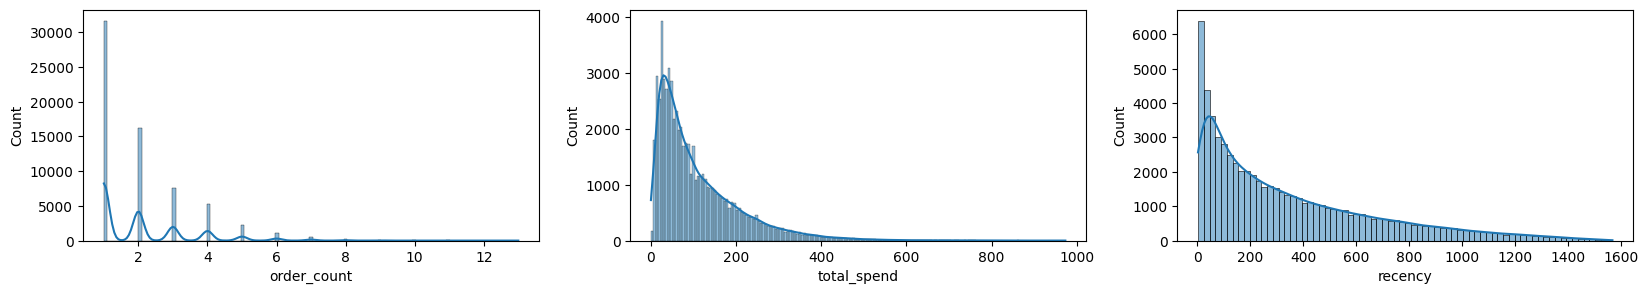

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,3))
for i,c in enumerate(rfm.columns):
  sns.histplot(rfm[c], kde=True, ax = ax[i])
  print(c,'skewness:',rfm[c].skew().round(2))

##Testing all normal distribution transforming methods:
1. log
2. squareroot
3. boxcox
4. cube root (x)^1/3

followed by skewness analysis of each method on each variable/column

order_count 
 original:  1.73
log:  0.64
squareroot:  1.09
boxcox:  0.25
cuberoot 0.92 

total_spend 
 original:  1.75
log:  -0.29
squareroot:  0.71
boxcox:  -0.02
cuberoot 0.39 

recency 
 original:  1.18
log:  -0.76
squareroot:  0.35
boxcox:  -0.11
cuberoot 0.03 



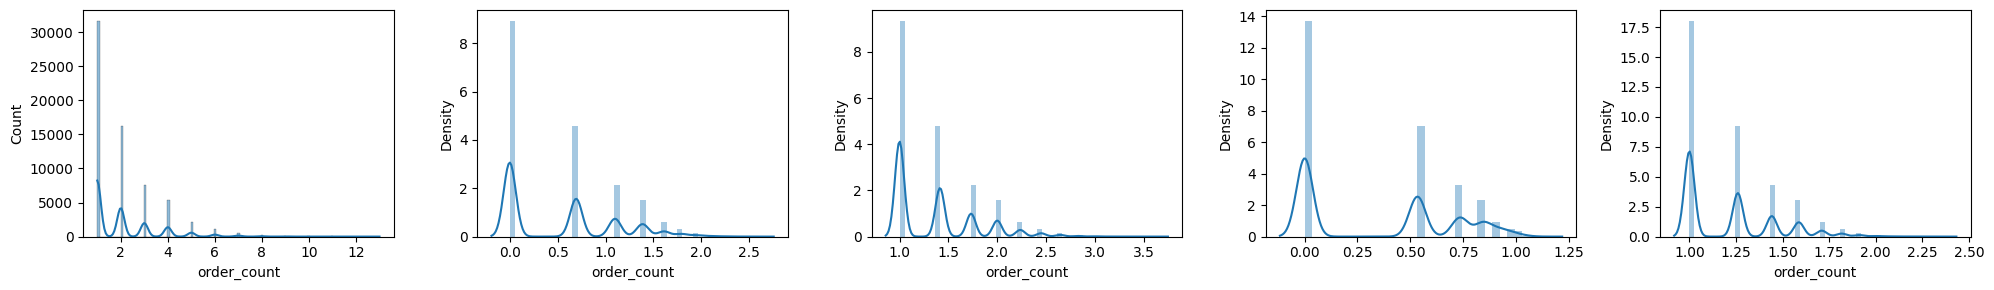

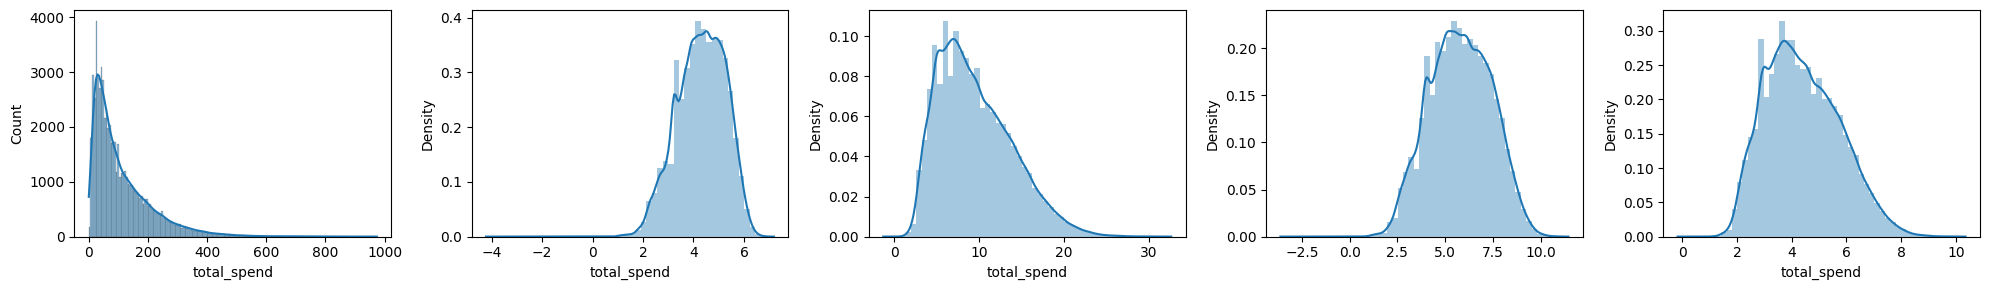

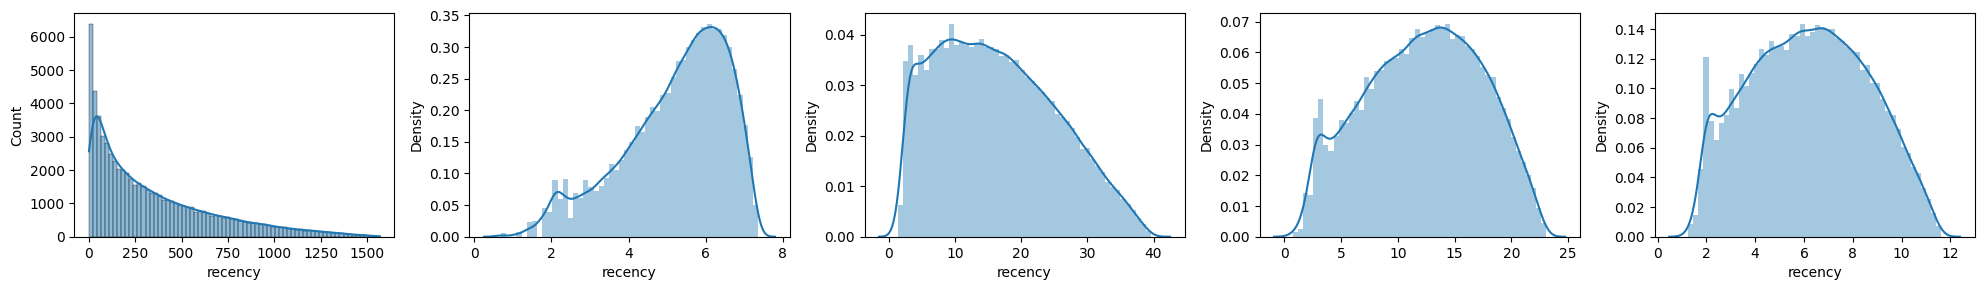

In [ ]:
df = rfm
for c in df.columns:
      fig, ax = plt.subplots(1, 5, figsize=(20,3))
      sns.histplot(df[c], kde=True, ax=ax[0])
      sns.distplot(np.log(df[c]),ax=ax[1])
      sns.distplot(np.sqrt(df[c]),ax=ax[2])
      sns.distplot(stats.boxcox(df[c])[0],ax=ax[3])
      sns.distplot(np.cbrt(df[c]),ax=ax[4])
      plt.tight_layout()

      print(c,'\n','original: ', df[c].skew().round(2))
      print('log: ', np.log(df[c]).skew().round(2))
      print('squareroot: ', np.sqrt(df[c]).skew().round(2))
      print('boxcox: ', pd.Series(stats.boxcox(df[c])[0]).skew().round(2))
      print('cuberoot', np.cbrt(df[c]).skew().round(2), '\n')


Column total_spend produces minus values in boxcox value. picking: boxcox for order frequency | cuberoot for recency, monetary (total_spend).

##Transforming RFM

In [ ]:
dist_rfm = rfm.copy()

In [ ]:
dist_rfm['order_count'] = stats.boxcox(dist_rfm['order_count'])[0]
dist_rfm['recency'] = np.cbrt(dist_rfm['recency'])
dist_rfm['total_spend'] = np.cbrt(dist_rfm['total_spend'])

In [ ]:
dist_rfm.describe()

,order_count,total_spend,recency
count,65014.00,65014.00,65014.00
mean,0.35,4.40,6.20
std,0.36,1.34,2.39
min,0.00,0.27,1.26
25%,0.00,3.36,4.31
50%,0.53,4.27,6.21
75%,0.74,5.35,8.05
max,1.10,9.91,11.62


##normalizing all variables into the same scale using StandardScaler sklearn

In [ ]:
normal_rfm = dist_rfm.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normal_rfm[['order_count','total_spend','recency']] = scaler.fit_transform(normal_rfm[['order_count','total_spend','recency']])

In [ ]:
normal_rfm.describe()

,order_count,total_spend,recency
count,65014.00,65014.00,65014.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-0.97,-3.07,-2.06
25%,-0.97,-0.77,-0.79
50%,0.51,-0.09,0.00
75%,1.08,0.71,0.77
max,2.10,4.10,2.26


Finding the most optimum K value (clusters)

In [ ]:
from sklearn.cluster import KMeans
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=7, random_state=42)
    kmeans.fit(normal_rfm)
    sse.append(kmeans.inertia_) # SSE to closest cluster centroid

Text(0, 0.5, 'SSE')

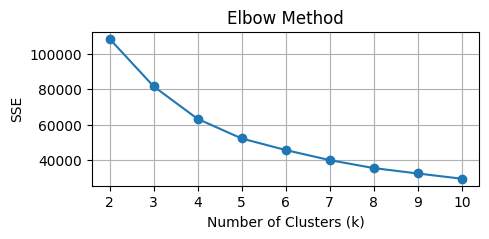

In [ ]:
 plt.figure(figsize=(5,2))
 plt.plot(range(2, 11), sse, marker='o')
 plt.title('Elbow Method')
 plt.grid(True)
 plt.xlabel("Number of Clusters (k)")
 plt.ylabel("SSE")

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=7, random_state = 42)
    kmeans.fit(normal_rfm)
    score = silhouette_score(normal_rfm, kmeans.labels_)
    silhouette_coefficients.append(score)

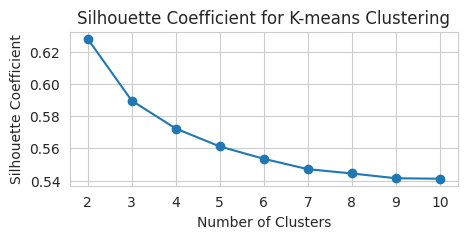

In [ ]:
x = range(2,11)
y = silhouette_coefficients
plt.figure(figsize=(5,2))
plt.plot(x, y, marker='o')
plt.title('Silhouette Coefficient for K-means Clustering')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

Picking n-cluster (k) & modeling:
*   K after a steep decline of SSE == 3
*   Highest silhoutte coeff after k(2) == 3

In [ ]:
model = KMeans(n_clusters=3, n_init=7, random_state=42)
model.fit(normal_rfm)
model.labels_

array([2, 1, 0, ..., 1, 2, 0], dtype=int32)

In [ ]:
normal_rfm['cluster'] = model.labels_

In [ ]:
normal_rfm = normal_rfm.reset_index()

In [ ]:
meltrfm = pd.melt(normal_rfm,
               id_vars = ['user_id', 'cluster'],
               value_vars = ['recency','order_count','total_spend'],
               var_name = ['attribute'],
               value_name = 'value')
meltrfm

,user_id,cluster,attribute,value
0,1,2,recency,-0.66
1,4,1,recency,0.76
2,6,0,recency,-0.55
3,7,0,recency,-0.75
4,8,2,recency,-0.09
...,...,...,...,...
195037,99994,1,total_spend,-0.38
195038,99996,2,total_spend,-1.25
195039,99998,1,total_spend,-1.26
195040,99999,2,total_spend,-0.38


Summarying & plotting

<Axes: xlabel='attribute', ylabel='value'>

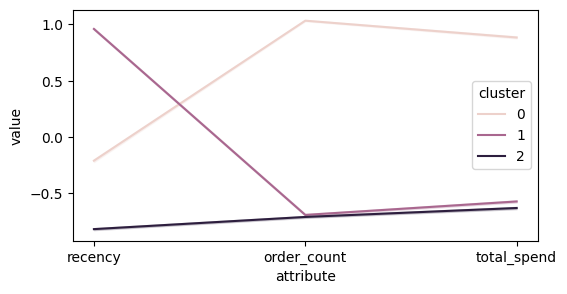

In [ ]:
plt.figure(figsize = (6,3))
plt.grid(False)
sns.lineplot(x='attribute', y='value', hue='cluster', data=meltrfm)

In [ ]:
rfm2.drop(rfm2.columns[4:7], axis=1, inplace=True)

In [ ]:
rfm2.groupby('cluster').agg(
    Recency = ('recency_x','mean'),
    Frequency_order = ('order_count_x','mean'),
    Monetary_value = ('total_spend_x','mean'),
    Users_n = ('user_id','count'))

,Recency,Frequency_order,Monetary_value,Users_n
cluster,,,,
0,264.35,3.30,190.39,26256
1,655.20,1.20,57.04,20933
2,98.60,1.18,53.22,17825


In [ ]:
data_rfm=normal_rfm.groupby('cluster').agg(
    Recency = ('recency','mean'),
    Frequency_order = ('order_count','mean'),
    Monetary_value = ('total_spend','mean'),
    Users_n = ('user_id','count')
)

In [ ]:
data_rfm

,Recency,Frequency_order,Monetary_value,Users_n
cluster,,,,
0,-0.21,1.03,0.88,26256
1,0.96,-0.69,-0.57,20933
2,-0.82,-0.71,-0.63,17825


Conclusion:
*   cluster 0 = **low** Recency, **highest** Frequency, **highest** Spending: valueble users
*   cluster 1 = **highest** Recency, **low** Frequency, **low** Spending: churning users
*   cluster 2 = **lowest** Recency, **lowest** Frequency, **lowest** Spending: new users





##References
Daqing C., Sai L.S, and Kun G., Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining (2012), Journal of Database Marketing and Customer Strategy Management.<br>
K. Jarrod Millman and Michael Aivazis. Python for Scientists and Engineers(2011). Computing in Science & Engineering.<br>
https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45<br>
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/<br>
https://realpython.com/k-means-clustering-python/